# Credit defaulters identification

### Introduction to the data set

German credit rating dataset contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit. The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset can be downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

### Read the data set

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
data = pd.read_csv( "germanCreditDefault.csv" )

In [13]:
data.shape

(1000, 17)

In [14]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [8]:
data.head(5).T

,0,1,2,3,4
checking_balance,< 0 DM,1 - 200 DM,unknown,< 0 DM,< 0 DM
months_loan_duration,6,48,12,42,24
credit_history,critical,good,critical,good,poor
purpose,furniture/appliances,furniture/appliances,education,furniture/appliances,car
amount,1169,5951,2096,7882,4870
savings_balance,unknown,< 100 DM,< 100 DM,< 100 DM,< 100 DM
employment_duration,> 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years
percent_of_income,4,2,2,2,3
years_at_residence,4,2,3,4,4
age,67,22,49,45,53


### EDA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [18]:
numerical_columns = data.select_dtypes(exclude='object').columns
categorical_columns = data.select_dtypes(include='object').columns

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Value counts of categorical columns

In [43]:
for col in categorical_columns:
    print('\nValueCounts for col {}:\n\n{}'.format(col, data[col].value_counts()))


ValueCounts for col checking_balance:

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

ValueCounts for col credit_history:

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

ValueCounts for col purpose:

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

ValueCounts for col savings_balance:

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

ValueCounts for col employment_duration:

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

ValueCounts for col other_credit:

none     814
bank     139
store     47
Name: other_credit, dtype: int64


In [19]:
len(numerical_columns), len(categorical_columns)

(7, 10)

### Univariate Analysis - distplots of numerical columns

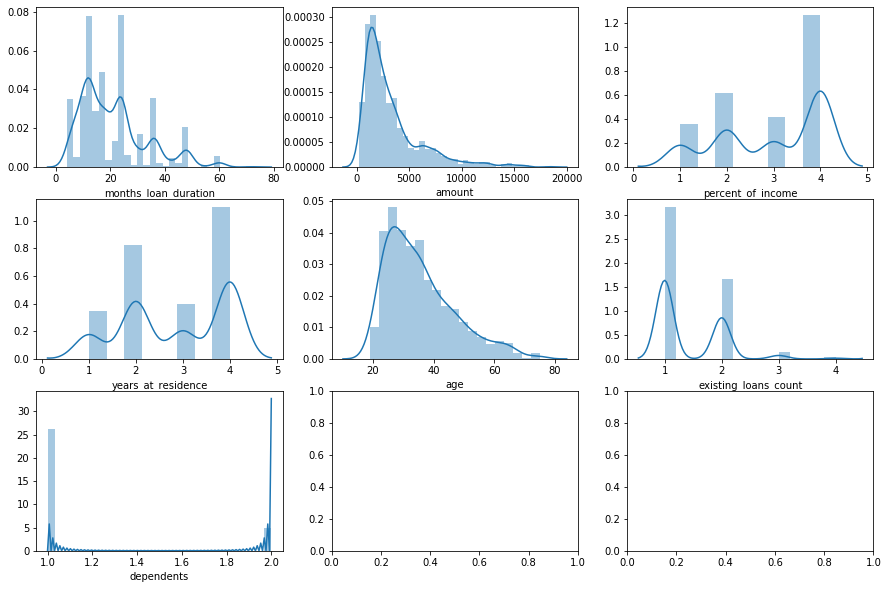

In [29]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
for col,subplot in zip(numerical_columns, ax.flatten()):
    sns.distplot(data[col], ax=subplot)
plt.show()

### Univariate Analysis - countplots of categorical columns

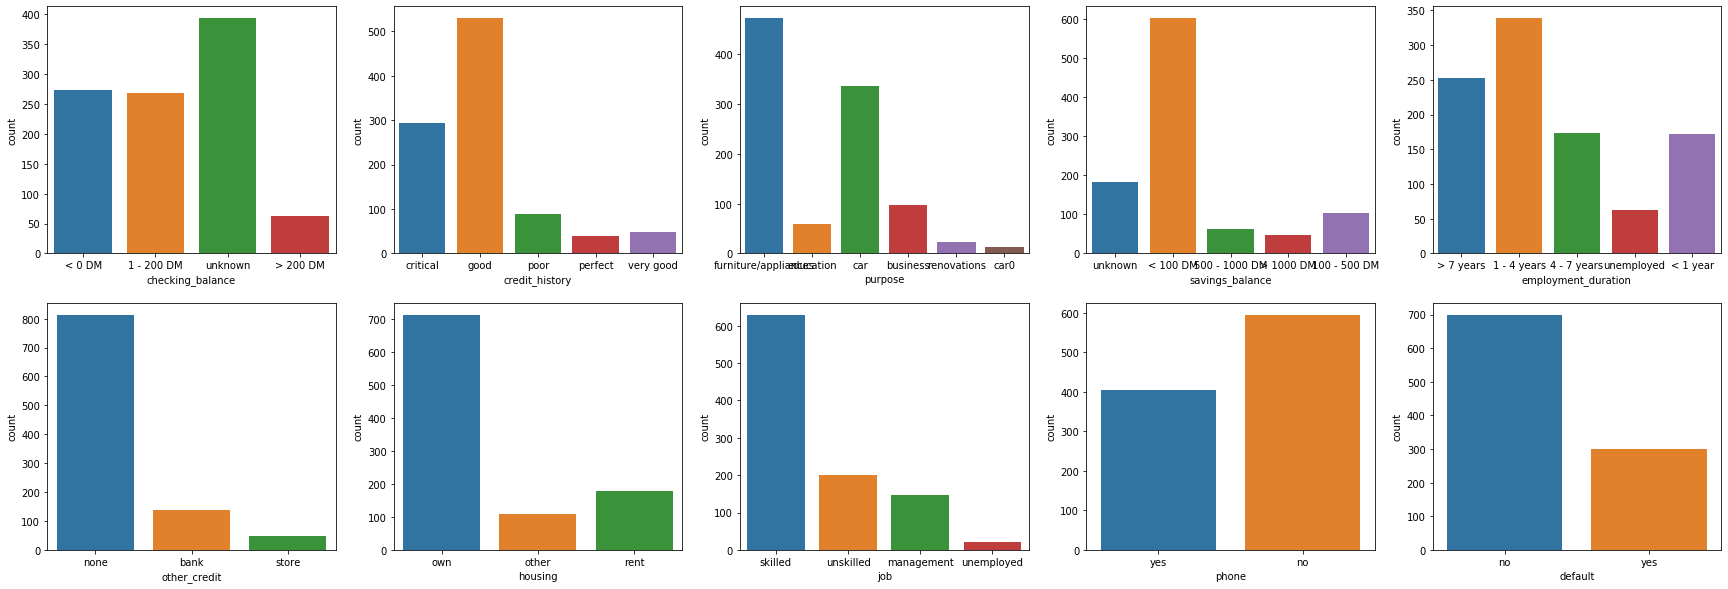

In [33]:
fig, ax = plt.subplots(2,5, figsize=(30,10))
for col,subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
plt.show()

### Bivariate Analysis - pairplot

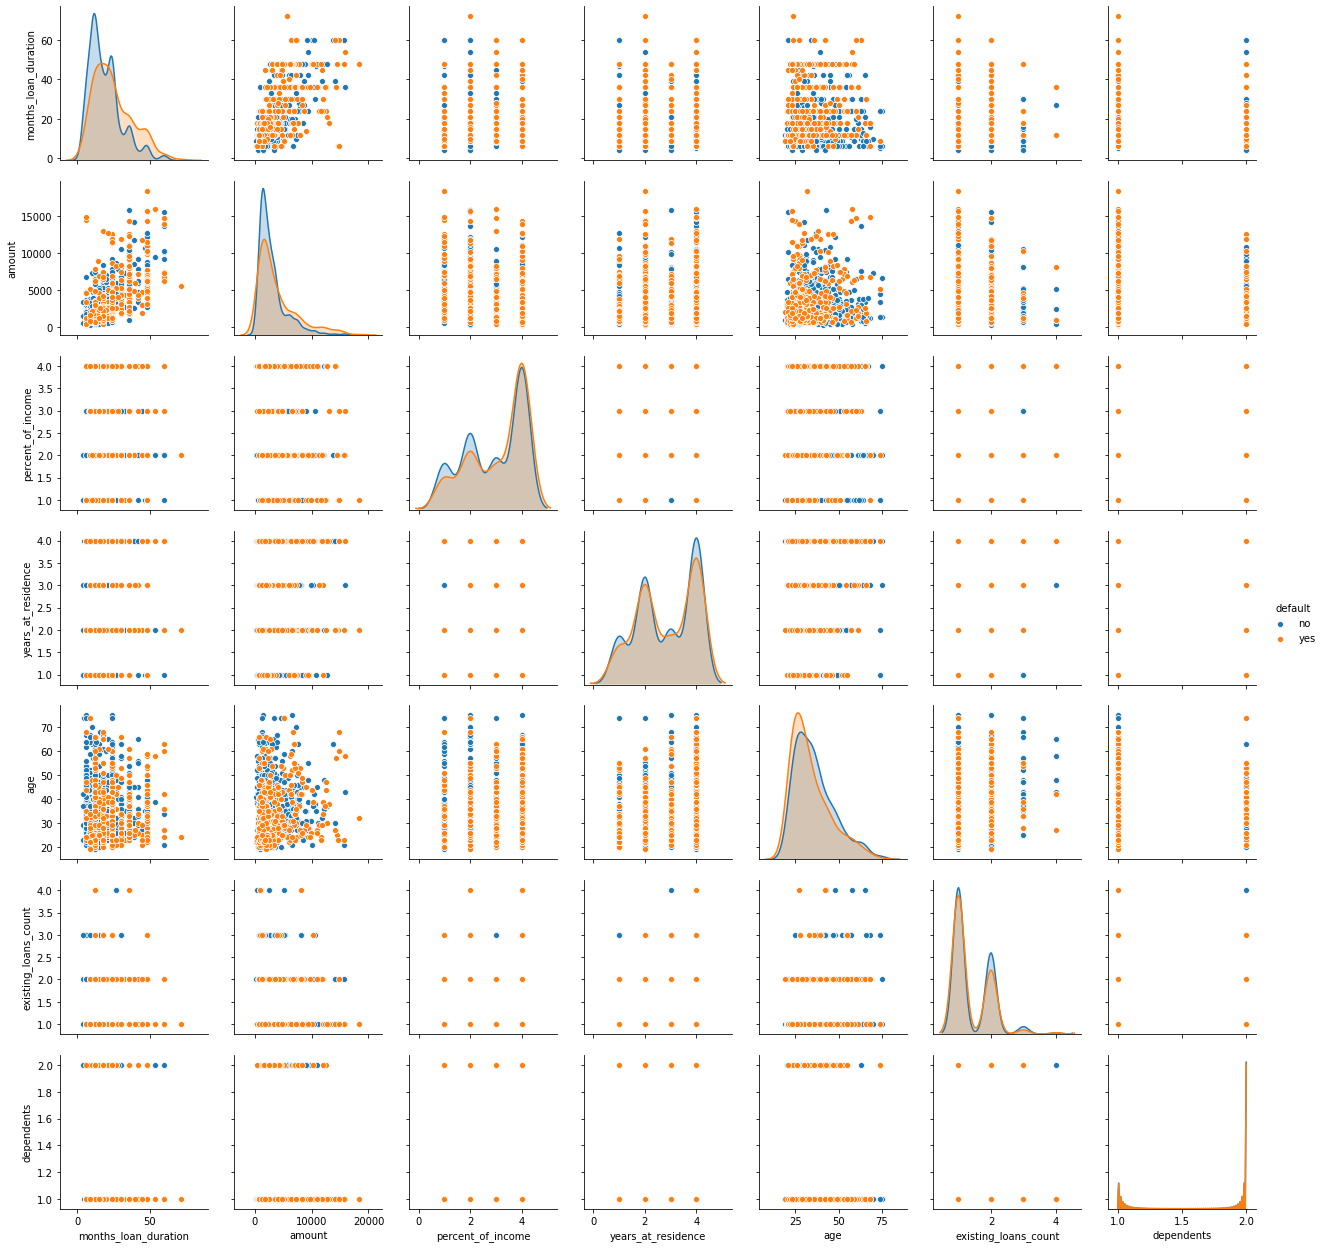

In [45]:
ax = sns.pairplot(data, hue='default')

- None of the columns are correlated with other columns

### Process non-numeric data

In [46]:
data = pd.get_dummies(data, drop_first=True)

In [47]:
data.shape

(1000, 36)

In [48]:
data.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_yes', 'default_yes'],
      dtype='object')

In [49]:
data.head(5).T

,0,1,2,3,4
months_loan_duration,6,48,12,42,24
amount,1169,5951,2096,7882,4870
percent_of_income,4,2,2,2,3
years_at_residence,4,2,3,4,4
age,67,22,49,45,53
existing_loans_count,2,1,1,1,2
dependents,1,1,2,2,2
checking_balance_< 0 DM,1,0,0,1,1
checking_balance_> 200 DM,0,0,0,0,0
checking_balance_unknown,0,0,1,0,0


In [50]:
data.dtypes

months_loan_duration               int64
amount                             int64
percent_of_income                  int64
years_at_residence                 int64
age                                int64
existing_loans_count               int64
dependents                         int64
checking_balance_< 0 DM            uint8
checking_balance_> 200 DM          uint8
checking_balance_unknown           uint8
credit_history_good                uint8
credit_history_perfect             uint8
credit_history_poor                uint8
credit_history_very good           uint8
purpose_car                        uint8
purpose_car0                       uint8
purpose_education                  uint8
purpose_furniture/appliances       uint8
purpose_renovations                uint8
savings_balance_500 - 1000 DM      uint8
savings_balance_< 100 DM           uint8
savings_balance_> 1000 DM          uint8
savings_balance_unknown            uint8
employment_duration_4 - 7 years    uint8
employment_durat

In [53]:
data.default_yes.unique()

array([0, 1], dtype=uint64)

In [54]:
data.default_yes.value_counts()

0    700
1    300
Name: default_yes, dtype: int64

### Separate data into train and test sets ( 70:30). Use random seed as 7 

In [55]:
X = data.drop('default_yes', axis=1)
y = data['default_yes']

In [56]:
X.shape, y.shape

((1000, 35), (1000,))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 35), (300, 35), (700,), (300,))

# Build best accuracy using KNN Classifier to find defaulters
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'

In [59]:
NNH = KNeighborsClassifier()

In [60]:
#fit
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
#train accuracy
NNH.score(X_train, y_train)

0.7242857142857143

In [62]:
#test accuracy
NNH.score(X_test, y_test)

0.64

In [63]:
predicted_labels = NNH.predict(X_test)

In [118]:
predicted_probabilities = NNH.predict_proba(X_test)

In [68]:
confusion_matrix(y_test, predicted_labels)

array([[171,  46],
       [ 62,  21]], dtype=int64)

In [112]:
recall_score(y_test, predicted_labels, average=None)

array([0.78801843, 0.25301205])

In [102]:
sum(recall_score(y_test, predicted_labels, average=None))

1.0410304813724947

In [110]:
precision_score(y_test, predicted_labels, average=None)

array([0.73390558, 0.31343284])

In [101]:
sum(precision_score(y_test, predicted_labels, average=None))

1.0473384152200371

In [114]:
f1_score(y_test, predicted_labels, average=None)

array([0.76, 0.28])

In [123]:
roc_auc_score(y_test,predicted_labels, average=None)

0.5205152406862473

In [104]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       217
           1       0.31      0.25      0.28        83

    accuracy                           0.64       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.62      0.64      0.63       300



# Optimize 'k', the optimal number of neighbors and find train & test accuracies

In [124]:
X_train.shape[0]

700

In [129]:
maxK = int(np.sqrt(X_train.shape[0]))
maxK

26

In [133]:
optimalK = 1
optimalTestAccuracy = 0

for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(X_train, y_train)
        if(NNH.score(X_test, y_test) > optimalTestAccuracy):
            optimalK = k_i
            optimalTestAccuracy = NNH.score(X_test, y_test)
print((optimalK, optimalTestAccuracy))

(15, 0.7166666666666667)


In [134]:
NNH = KNeighborsClassifier(n_neighbors=15)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [135]:
NNH.score(X_train, y_train)

0.7142857142857143

In [136]:
NNH.score(X_test, y_test)

0.7166666666666667

In [139]:
predicted_labels = NNH.predict(X_test)

In [140]:
predicted_probabilities = NNH.predict_proba(X_test)

In [138]:
# Test Confusion matrix
confusion_matrix(y_test, NNH.predict(X_test))

array([[206,  11],
       [ 74,   9]], dtype=int64)

In [147]:
recall_score(y_test, predicted_labels, average=None)

array([0.94930876, 0.10843373])

In [148]:
sum(recall_score(y_test, predicted_labels, average=None))

1.0577424907001276

In [149]:
precision_score(y_test, predicted_labels, average=None)

array([0.73571429, 0.45      ])

In [150]:
sum(precision_score(y_test, predicted_labels, average=None))

1.1857142857142857

In [151]:
f1_score(y_test, predicted_labels, average=None)

array([0.82897384, 0.17475728])

In [152]:
roc_auc_score(y_test,predicted_labels, average=None)

0.5288712453500639

In [154]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       217
           1       0.45      0.11      0.17        83

    accuracy                           0.72       300
   macro avg       0.59      0.53      0.50       300
weighted avg       0.66      0.72      0.65       300



- KNN model is giving an average performance with test accuracy of 72%, but the model is a good fit model because the train accuarcy is 71% which is nearly equal to test accuracy